# Project Description
The goal of this project is to predict whether a person is Male or Female depending on various facial features and measurements. People from different genders tend to have differing facial features. For example, males tend to have thinner lips while females lips tend to be fuller. The features of this dataset will be displayed below. The predictions will be made using the following classification models: Discriminant Analysis, KNN, Naive Bayes, SVM-Linear, SVM-NonLinear. The output of all of these models will be analyzed.` 

## Link to Dataset
https://www.kaggle.com/elakiricoder/gender-classification-dataset

# Importing Libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [85]:
dataset = pd.read_csv('gender_classification_v7.csv')

## Preview of Dataset

In [86]:
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


Label encode gender so it can be used for data exploration.

In [87]:
from sklearn.preprocessing import LabelEncoder
# instantiate LabelEncoder objects
le = LabelEncoder()
# encode data
dataset['gender'] = le.fit_transform(dataset['gender'])

# Split Data
Split dataset into independent and dependent variables.


In [88]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Split data into train and validation sets.

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Data Exploration
## Perform Correlation Analysis

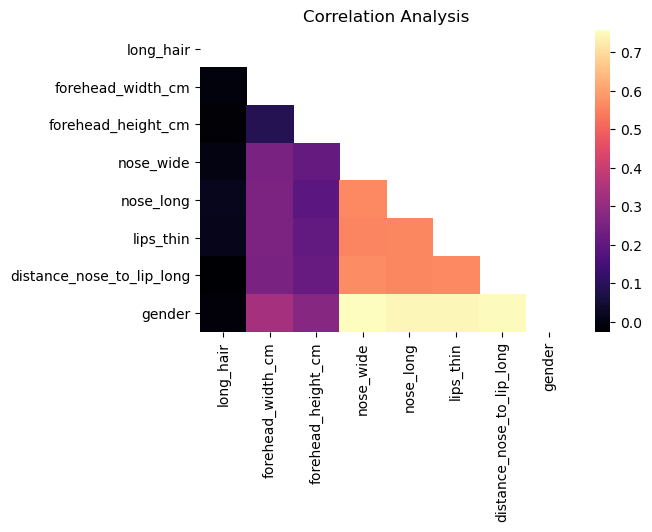

In [90]:
corr_matrix = dataset.corr()

mask = np.triu(np.ones_like(corr_matrix,dtype = bool)) # Only keep the upper triangle of an array.
from seaborn import heatmap
plt.figure(dpi=100)
plt.title('Correlation Analysis')
heatmap(corr_matrix,mask=mask,annot=False,lw=0,linecolor='white',cmap='magma',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

In [91]:
corr_matrix["gender"].sort_values(ascending=False)

gender                       1.000000
nose_wide                    0.758502
distance_nose_to_lip_long    0.754850
nose_long                    0.744147
lips_thin                    0.743319
forehead_width_cm            0.334125
forehead_height_cm           0.277190
long_hair                   -0.010767
Name: gender, dtype: float64

The categorical features, other then "long_hair", have a higher correlation with gender then the numerical measurments of facial features.

# Data Preprocessing
## Processing Independent Variables
### Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
# instantiate StandardScalar objects
sc_test = StandardScaler()
sc_train = StandardScaler()
# scale independent data columns [1:2]
X_train[:, 1:3] = sc_test.fit_transform(X_train[:, 1:3])
X_test[:, 1:3] = sc_test.fit_transform(X_test[:, 1:3])

## Processing Dependent Variables
### Label Encoding

In [93]:
from sklearn.preprocessing import LabelEncoder
# instantiate LabelEncoder objects
le_train = LabelEncoder()
le_test = LabelEncoder()
# encode data
y_train = le_train.fit_transform(y_train)
y_test = le_test.fit_transform(y_test)

# Train Models

## Discriminant Analysis Model

### Linear

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# instantiate linear desciminant analysis object
lda = LinearDiscriminantAnalysis()
# train model
lda = lda.fit(X_train, y_train)

### Quadratic

In [95]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# instantiate quadratic desciminant analysis object
qda = LinearDiscriminantAnalysis()
# train model
qda = lda.fit(X_train, y_train)

## KNN Model

In [96]:
from sklearn.neighbors import KNeighborsClassifier
# variable holds number of neigbors
neighbors = 3
# instantiate knn object
knn = KNeighborsClassifier(n_neighbors=neighbors) 
# train model
knn = knn.fit(X_train, y_train)

## Naive Bayes Model
### Gaussian

In [97]:
from sklearn.naive_bayes import GaussianNB
# instantiate gaussian naive bayes object
gnb = GaussianNB()
# train model
gnb = gnb.fit(X_train, y_train)

## SVM Models
### Linear

In [98]:
from sklearn.svm import SVC
# instantiate linear svm object
svml = SVC(kernel='linear')
# train model
svml = svml.fit(X_train, y_train)

### Non-Linear

In [99]:
from sklearn.svm import SVC
# instantiate non linear svm object using gaussian kernal
svmrbf = SVC(kernel='rbf')
# train model
svmrbf = svmrbf.fit(X_train, y_train)

# Validate Models with Test Set

## Descriminant Analysis Models
### Linear

In [100]:
# make prediction
pred_lda = lda.predict(X_test)
# show predicitons in table
pd.DataFrame([le.inverse_transform(pred_lda), le.inverse_transform(y_test)], index=['Prediction', 'Validation']).T.head(n=10)

,Prediction,Validation
0,Female,Female
1,Male,Male
2,Female,Female
3,Female,Female
4,Female,Female
5,Male,Male
6,Male,Male
7,Female,Female
8,Male,Male
9,Male,Male


### Quadratic

In [101]:
# make prediction
pred_qda = qda.predict(X_test)
# show predicitons in table
pd.DataFrame([le.inverse_transform(pred_qda), le.inverse_transform(y_test)], index=['Prediction', 'Validation']).T.head(n=10)

,Prediction,Validation
0,Female,Female
1,Male,Male
2,Female,Female
3,Female,Female
4,Female,Female
5,Male,Male
6,Male,Male
7,Female,Female
8,Male,Male
9,Male,Male


## KNN Model

In [102]:
# make prediction
pred_knn = knn.predict(X_test)
# show predicitons in table
pd.DataFrame([le.inverse_transform(pred_knn), le.inverse_transform(y_test)], index=['Prediction', 'Validation']).T.head(n=10)

,Prediction,Validation
0,Female,Female
1,Male,Male
2,Female,Female
3,Female,Female
4,Female,Female
5,Male,Male
6,Male,Male
7,Female,Female
8,Male,Male
9,Female,Male


## Naive Bayes Model


In [103]:
# make prediction
pred_gnb = gnb.predict(X_test)
# show predicitons in table
pd.DataFrame([le.inverse_transform(pred_gnb), le.inverse_transform(y_test)], index=['Prediction', 'Validation']).T.head(n=10)

,Prediction,Validation
0,Female,Female
1,Male,Male
2,Female,Female
3,Female,Female
4,Female,Female
5,Male,Male
6,Male,Male
7,Female,Female
8,Male,Male
9,Male,Male


## SVR Models
### Linear

In [104]:
# make prediction
pred_svml = svml.predict(X_test)
# show predicitons in table
pd.DataFrame([le.inverse_transform(pred_svml), le.inverse_transform(y_test)], index=['Prediction', 'Validation']).T.head(n=10)

,Prediction,Validation
0,Female,Female
1,Male,Male
2,Female,Female
3,Female,Female
4,Female,Female
5,Male,Male
6,Male,Male
7,Female,Female
8,Male,Male
9,Male,Male


### Non Linear

In [105]:
# make prediction
pred_svmrbf = svmrbf.predict(X_test)
# show predicitons in table
pd.DataFrame([le.inverse_transform(pred_svmrbf), le.inverse_transform(y_test)], index=['Prediction', 'Validation']).T.head(n=10)

,Prediction,Validation
0,Female,Female
1,Male,Male
2,Female,Female
3,Female,Female
4,Female,Female
5,Male,Male
6,Male,Male
7,Female,Female
8,Male,Male
9,Female,Male


# Measuring Model Performance
## Descriminant Analysis Models
### Linear

In [106]:
from sklearn.model_selection import cross_val_score
scores_lda = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv=5)
print('Averaged prediction accuracy = ', round(np.average(scores_lda), 4))

Averaged prediction accuracy =  0.9685


### Quadratic

In [107]:
scores_qda = cross_val_score(qda, X_train, y_train, scoring='accuracy', cv=5)
print('Averaged prediction accuracy = ', round(np.average(scores_qda), 4))

Averaged prediction accuracy =  0.9685


## KNN

In [108]:
scores_knn = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
print('Averaged prediction accuracy = ', round(np.average(scores_knn), 4))

Averaged prediction accuracy =  0.9672


## Naive Bayes

In [109]:
scores_gnb = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv=5)
print('Averaged prediction accuracy = ', round(np.average(scores_gnb), 4))

Averaged prediction accuracy =  0.9705


## SVR Models
### Linear

In [110]:
scores_svml = cross_val_score(svml, X_train, y_train, scoring='accuracy', cv=5)
print('Averaged prediction accuracy = ', round(np.average(scores_svml), 4))

Averaged prediction accuracy =  0.9672


### Non Linear

In [111]:
scores_svmrbf = cross_val_score(svmrbf, X_train, y_train, scoring='accuracy', cv=5)
print('Averaged prediction accuracy = ', round(np.average(scores_svmrbf), 4))

Averaged prediction accuracy =  0.9745


## Model Performance Overview

In [116]:
accuracies = {'Accuracy' : [
    round(np.average(scores_lda), 4),
    round(np.average(scores_qda), 4),
    round(np.average(scores_knn), 4),
    round(np.average(scores_gnb), 4),
    round(np.average(scores_svml), 4),
    round(np.average(scores_svmrbf), 4)
]}
pd.DataFrame(data=accuracies, index=[
    'Linear Discriminant Analysis',
    'Quadratic Discriminant Analysis',
    'KNN',
    'Naive Bayes',
    'SVM Linear',
    'SVM Non Linear'])

,Accuracy
Linear Discriminant Analysis,0.9685
Quadratic Discriminant Analysis,0.9685
KNN,0.9672
Naive Bayes,0.9705
SVM Linear,0.9672
SVM Non Linear,0.9745


# Conclusion